Calculation of bubble sizes:

In [2]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('styles/lato_style.mplstyle')

import oommf_tools as ot
import glob
import re

In [4]:
import scipy.optimize as so
import scipy.interpolate as si

# Test

We load a simulation and show how we compute the bubble size through the bubble centres:

In [5]:
sim_folder = '../sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L1200nm_t200nm/'
find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)

In [10]:
file_index = -15
_file = file_list[file_index]
print('Bz = {} mT'.format(find_field(file_list[file_index])))
omf_file = ot.OOMMFDataRead(_file)
omf_file.set_coordinates()
omf_file.read_m()

rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))

Bz = 190 mT


In [11]:
np.unique(omf_file.z)[25]

2.0000000000000178

In [12]:
z_index = 0

xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                 omf_file.y == ys[len(ys) // 2]) 

filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                 omf_file.x == xs[len(xs) // 2]) 

# Function interpolation
mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                          omf_file.mz[filter_across_x],
                          kind='cubic')
mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                          omf_file.mz[filter_across_y],
                          kind='cubic')

z =  2.0000000000000178 nm


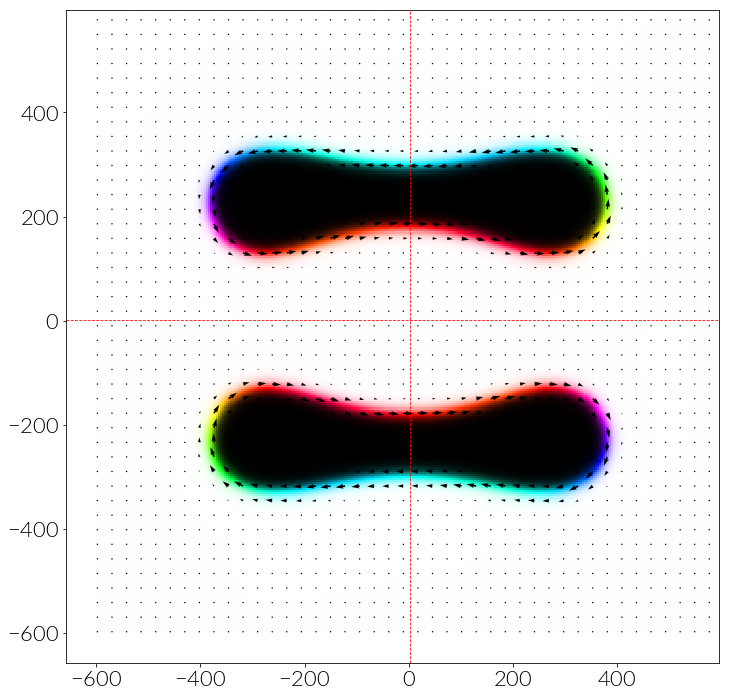

In [17]:
f, ax = plt.subplots(ncols=1, figsize=(12, 12))

z_index = 25
z_filter = omf_file.z == np.unique(omf_file.z)[z_index]
print('z = ', np.unique(omf_file.z)[z_index], 'nm')

dx = xs[1] - xs[0]
ax.imshow(rgb_map[z_filter].reshape(len(xs), -1, 3), 
          extent=[(xs.min() + dx * 0.5), (xs.max() - dx * 0.5),
                  (ys.min() + dx * 0.5), (ys.max() - dx * 0.5),
                  ],
          origin='lower'
          )
# plt.scatter(x_oommf, y_oommf, c=rgb_map)

st = 8

# Arrows filter
arr_fltr_tmp = np.zeros(len(xs))
arr_fltr_tmp[::7] = 1
arr_fltr = np.zeros_like(omf_file.x[z_filter]).reshape(len(xs), -1)
arr_fltr[::7] = arr_fltr_tmp
arr_fltr = arr_fltr.astype(np.bool).reshape(-1,)

plt.quiver(omf_file.x[z_filter][arr_fltr], omf_file.y[z_filter][arr_fltr], 
           omf_file.mx[z_filter][arr_fltr], omf_file.my[z_filter][arr_fltr],
           scale_units='xy', angles='xy', scale=0.05
           )

plt.axvline(x=xs[len(xs) // 2], color='r', ls='--', lw=0.8)
plt.axhline(y=ys[len(ys) // 2], color='r', ls='--', lw=0.8)


# plt.savefig('oommf_bubble_measure.jpg', dpi=300, bbox_inches='tight')

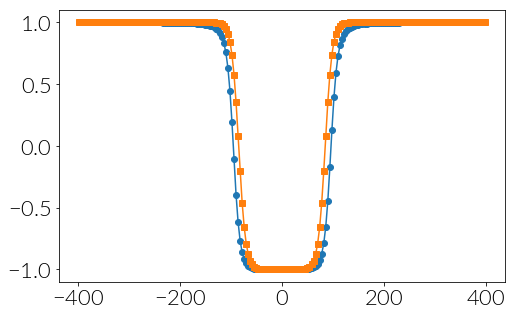

In [180]:
mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                          omf_file.mz[filter_across_x],
                          kind='cubic')
mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                          omf_file.mz[filter_across_y],
                          kind='cubic')


xi = np.linspace(-390, 390, 200)
# plt.plot(xi, mz_across_x(xi), '-C0')

plt.plot(omf_file.x[filter_across_x], omf_file.mz[filter_across_x], 'oC0-')
plt.plot(omf_file.y[filter_across_y], omf_file.mz[filter_across_y], 'sC1-')

In [181]:
print(so.brentq(mz_across_x, -300, 0))
print(so.brentq(mz_across_x, 0, 300))
print(so.brentq(mz_across_x, 0, 300) - so.brentq(mz_across_x, -300, 0))

-95.43202305684461
96.31056747762081
191.74259053446542


In [182]:
print(so.brentq(mz_across_y, -300, 0))
print(so.brentq(mz_across_y, 0, 300))
print(so.brentq(mz_across_y, 0, 300) - so.brentq(mz_across_y, -300, 0))

-84.87936373107537
84.87936373107514
169.75872746215052


# Calculation of skyrmion size

Skyrmion size from OOMMF simulations:

## Thickness: 100 nm

Calculation of skyrmion size as a function of the applied field at different sample $z$-layers

In [ ]:
sim_folder = '../sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_L800nm_field-sweep/omfs_L800nm_t100nm/'
find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)

In [79]:
bubble_size_x = {}
bubble_size_y = {}

for z_index in range(len(zs)):
    bubble_size_x[z_index] = []
    bubble_size_y[z_index] = []
    
for i, _file in enumerate(file_list[17:23]):
    i += 17
    
    # _file = file_list[file_index]
    Bz = find_field(file_list[i])
    print('Processing: Bz = {} mT'.format(Bz))
    
    omf_file = ot.OOMMFDataRead(_file)
    omf_file.set_coordinates()
    omf_file.read_m()

    # rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))
    
    xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

    for z_index in range(len(zs)):
           
        filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.y == ys[len(ys) // 2]) 

        filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.x == xs[len(xs) // 2]) 

        mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                                  omf_file.mz[filter_across_x],
                                  kind='cubic')
        mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                                  omf_file.mz[filter_across_y],
                                  kind='cubic')

        size_0 = so.brentq(mz_across_x, -300, 0)
        size_1 = so.brentq(mz_across_x, 0, 300)
        bubble_size_x[z_index].append([Bz * 1e-3, size_1 - size_0])

        size_0 = so.brentq(mz_across_y, -300, 0)
        size_1 = so.brentq(mz_across_y, 0, 300)
        bubble_size_y[z_index].append([Bz * 1e-3, size_1 - size_0])

Processing: Bz = 210 mT
Processing: Bz = 220 mT
Processing: Bz = 230 mT
Processing: Bz = 240 mT
Processing: Bz = 250 mT
Processing: Bz = 260 mT


In [80]:
for z_index in range(len(zs)):
    bubble_size_x[z_index] = np.array(bubble_size_x[z_index])
    bubble_size_y[z_index] = np.array(bubble_size_y[z_index])

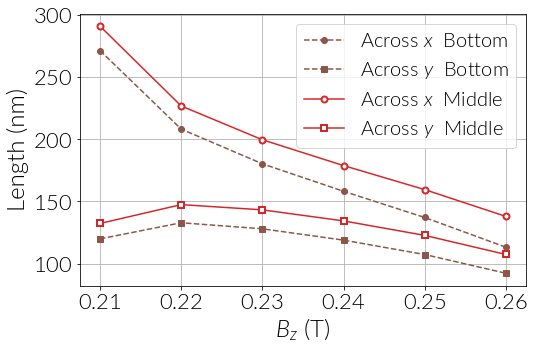

In [118]:
f = plt.figure()
ax = f.add_subplot(111)

# Bottom layer
ax.plot(bubble_size_x[0][:, 0], bubble_size_x[0][:, 1], 'o--C5', label=r'Across $x$  Bottom')
ax.plot(bubble_size_y[0][:, 0], bubble_size_y[0][:, 1], 's--C5', label=r'Across $y$  Bottom')

# Centre layer
ax.plot(bubble_size_x[12][:, 0], bubble_size_x[12][:, 1], 'o-C3', markerfacecolor='w', mew=2,
        label=r'Across $x$  Middle')
ax.plot(bubble_size_y[12][:, 0], bubble_size_y[12][:, 1], 's-C3', markerfacecolor='w', mew=2,
        label=r'Across $y$  Middle')

ax.set_xlabel(r'$B_{z}$ (T)')
ax.set_ylabel(r'Length (nm)')

ax.legend()
ax.grid()

plt.savefig('bubble_size_vs_Bz_A20e-12_mu0Ms_648e-3_L800nm.png',
            bbox_inches='tight', dpi=200)

In [106]:
zs

array([-4.8000000e+01, -4.4000000e+01, -4.0000000e+01, -3.6000000e+01,
       -3.2000000e+01, -2.8000000e+01, -2.4000000e+01, -2.0000000e+01,
       -1.6000000e+01, -1.2000000e+01, -8.0000000e+00, -4.0000000e+00,
        6.6174449e-15,  4.0000000e+00,  8.0000000e+00,  1.2000000e+01,
        1.6000000e+01,  2.0000000e+01,  2.4000000e+01,  2.8000000e+01,
        3.2000000e+01,  3.6000000e+01,  4.0000000e+01,  4.4000000e+01,
        4.8000000e+01])

## Thickness: 200 nm

In [7]:
bubble_size_x = {}
bubble_size_y = {}

In [8]:
for L in [600, 800, 1000, 1200]:
# for L in [1200]:
    sim_folder = ('sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/'
                  'omfs_L{}nm_t200nm/'.format(L))
    find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
    file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)
    
    bubble_size_x['L{}'.format(L)] = {}
    bubble_size_y['L{}'.format(L)] = {}

    print('Processing L = {} nm ********'.format(L))
    
    for j, i in enumerate(range(4, 23)):

        # _file = file_list[file_index]
        try:
            _file = file_list[i]
        except IndexError:
            continue
        
        Bz = find_field(_file)
        print('Processing: Bz = {} mT'.format(Bz))

        omf_file = ot.OOMMFDataRead(_file)
        omf_file.set_coordinates()
        omf_file.read_m()

        # rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))

        xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

        # Create empty array when calling the first calculation
        if j == 0:
            for z_index in range(len(zs)):
                bubble_size_x['L{}'.format(L)][z_index] = []
                bubble_size_y['L{}'.format(L)][z_index] = []

        for z_index in range(len(zs)):

            filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                             omf_file.y == ys[len(ys) // 2]) 

            filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                             omf_file.x == xs[len(xs) // 2]) 

            mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                                      omf_file.mz[filter_across_x],
                                      kind='cubic')
            mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                                      omf_file.mz[filter_across_y],
                                      kind='cubic')
        
            try:
                size_0 = so.brentq(mz_across_x, xs.min() + 10, 0)
                size_1 = so.brentq(mz_across_x, 0, xs.max() - 10)
                bubble_size_x['L{}'.format(L)][z_index].append([Bz * 1e-3, size_1 - size_0])
            except ValueError:
                continue
                
            size_0 = so.brentq(mz_across_y, ys.min() + 10, 0)
            size_1 = so.brentq(mz_across_y, 0, ys.max() - 10)
            bubble_size_y['L{}'.format(L)][z_index].append([Bz * 1e-3, size_1 - size_0])

    for z_index in range(len(zs)):
        bubble_size_x['L{}'.format(L)][z_index] = np.array(bubble_size_x['L{}'.format(L)][z_index])
        bubble_size_y['L{}'.format(L)][z_index] = np.array(bubble_size_y['L{}'.format(L)][z_index])

Processing L = 600 nm ********
Processing: Bz = 80 mT
Processing: Bz = 90 mT
Processing: Bz = 100 mT
Processing: Bz = 110 mT
Processing: Bz = 120 mT
Processing: Bz = 130 mT
Processing: Bz = 140 mT
Processing: Bz = 150 mT
Processing: Bz = 160 mT
Processing: Bz = 170 mT
Processing: Bz = 180 mT
Processing: Bz = 190 mT
Processing: Bz = 200 mT
Processing: Bz = 210 mT
Processing: Bz = 220 mT
Processing: Bz = 230 mT
Processing: Bz = 240 mT
Processing: Bz = 250 mT
Processing: Bz = 260 mT
Processing L = 800 nm ********
Processing: Bz = 80 mT
Processing: Bz = 90 mT
Processing: Bz = 100 mT
Processing: Bz = 110 mT
Processing: Bz = 120 mT
Processing: Bz = 130 mT
Processing: Bz = 140 mT
Processing: Bz = 150 mT
Processing: Bz = 160 mT
Processing: Bz = 170 mT
Processing: Bz = 180 mT
Processing: Bz = 190 mT
Processing: Bz = 200 mT
Processing: Bz = 210 mT
Processing: Bz = 220 mT
Processing: Bz = 230 mT
Processing: Bz = 240 mT
Processing: Bz = 250 mT
Processing: Bz = 260 mT
Processing L = 1000 nm *******

In [9]:
bubble_size_x['L1200']

{0: array([[8.00000000e-02, 1.59911318e+02],
        [9.00000000e-02, 1.46188360e+02],
        [1.00000000e-01, 1.32095297e+02],
        [2.10000000e-01, 9.20058797e+01],
        [2.20000000e-01, 9.47020399e+01],
        [2.30000000e-01, 9.75474675e+01],
        [2.40000000e-01, 2.47749382e+02],
        [2.50000000e-01, 2.34539252e+02],
        [2.60000000e-01, 2.18745318e+02]]),
 1: array([[8.00000000e-02, 1.60626414e+02],
        [9.00000000e-02, 1.46880118e+02],
        [1.00000000e-01, 1.32667078e+02],
        [2.10000000e-01, 9.26448400e+01],
        [2.20000000e-01, 9.55290141e+01],
        [2.30000000e-01, 9.85745147e+01],
        [2.40000000e-01, 2.51284018e+02],
        [2.50000000e-01, 2.38128220e+02],
        [2.60000000e-01, 2.22348280e+02]]),
 2: array([[8.00000000e-02, 1.61789819e+02],
        [9.00000000e-02, 1.48021222e+02],
        [1.00000000e-01, 1.33633729e+02],
        [2.10000000e-01, 9.37871642e+01],
        [2.20000000e-01, 9.69829926e+01],
        [2.30000000e-

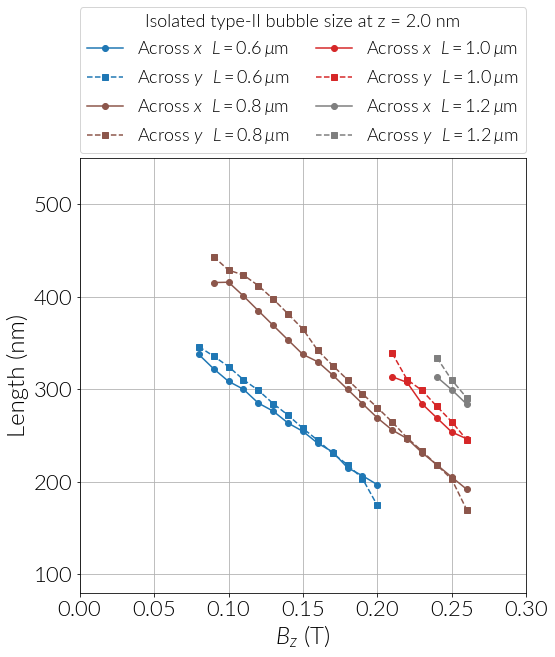

In [55]:
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)

layer_idx = 25

# Bottom layer
ax.plot(bubble_size_x['L600'][layer_idx][:, 0], 
        bubble_size_x['L600'][layer_idx][:, 1], 'o-C0', label=r'Across $x$  $L=0.6\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L600'][layer_idx][:, 0], 
        bubble_size_y['L600'][layer_idx][:, 1], 's--C0', label=r'Across $y$  $L=0.6\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L800'][layer_idx][:, 0], 
        bubble_size_x['L800'][layer_idx][:, 1], 'o-C5', label=r'Across $x$  $L=0.8\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L800'][layer_idx][:, 0], 
        bubble_size_y['L800'][layer_idx][:, 1], 's--C5', label=r'Across $y$  $L=0.8\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L1000'][layer_idx][:, 0][4:], 
        bubble_size_x['L1000'][layer_idx][:, 1][4:], 'o-C3', label=r'Across $x$  $L=1.0\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L1000'][layer_idx][:, 0][4:], 
        bubble_size_y['L1000'][layer_idx][:, 1][4:], 's--C3', label=r'Across $y$  $L=1.0\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L1200'][layer_idx][:, 0][6:], 
        bubble_size_x['L1200'][layer_idx][:, 1][6:], 'o-C7', label=r'Across $x$  $L=1.2\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L1200'][layer_idx][:, 0][6:], 
        bubble_size_y['L1200'][layer_idx][:, 1][6:], 's--C7', label=r'Across $y$  $L=1.2\:\mu\mathrm{m}$')

# Centre layer
# ax.plot(bubble_size_x[12][:, 0], bubble_size_x[12][:, 1], 'o-C3', markerfacecolor='w', mew=2,
#         label=r'Across $x$  Middle')
# ax.plot(bubble_size_y[12][:, 0], bubble_size_y[12][:, 1], 's-C3', markerfacecolor='w', mew=2,
#         label=r'Across $y$  Middle')

ax.set_xlabel(r'$B_{z}$ (T)')
ax.set_ylabel(r'Length (nm)')

# ax.legend()
l = ax.legend(ncol=2, loc='lower left',
              bbox_to_anchor=(0, 1.01, 1.0, 1),
              mode='expand', borderaxespad=0.,
              fontsize=18,
              title='Isolated type-II bubble size at z = {:.1f} nm'.format(zs[layer_idx])
              )
l.get_title().set_fontsize('18')

ax.grid()

ax.set_xlim(0, 0.3)
ax.set_ylim(80, 550)

plt.savefig('bubble_size_vs_Bz_A20e-12_mu0Ms_648e-3_t-CENTRE.png',
            bbox_inches='tight', dpi=200)

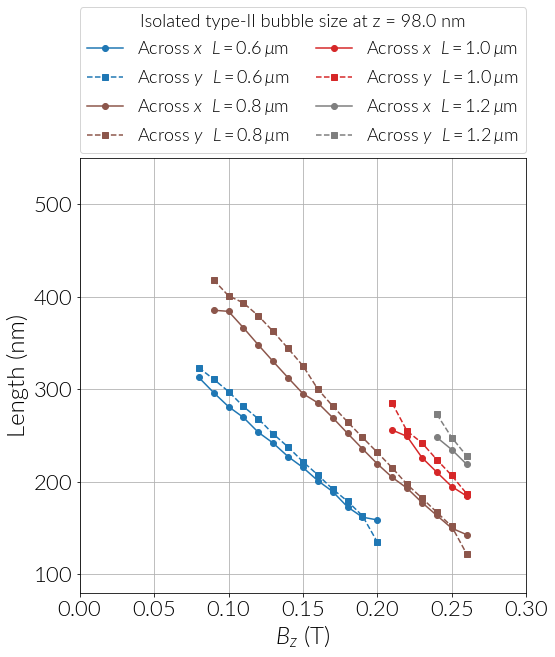

In [56]:
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)

layer_idx = 49

# Bottom layer
ax.plot(bubble_size_x['L600'][layer_idx][:, 0], 
        bubble_size_x['L600'][layer_idx][:, 1], 'o-C0', label=r'Across $x$  $L=0.6\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L600'][layer_idx][:, 0], 
        bubble_size_y['L600'][layer_idx][:, 1], 's--C0', label=r'Across $y$  $L=0.6\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L800'][layer_idx][:, 0], 
        bubble_size_x['L800'][layer_idx][:, 1], 'o-C5', label=r'Across $x$  $L=0.8\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L800'][layer_idx][:, 0], 
        bubble_size_y['L800'][layer_idx][:, 1], 's--C5', label=r'Across $y$  $L=0.8\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L1000'][layer_idx][:, 0][4:], 
        bubble_size_x['L1000'][layer_idx][:, 1][4:], 'o-C3', label=r'Across $x$  $L=1.0\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L1000'][layer_idx][:, 0][4:], 
        bubble_size_y['L1000'][layer_idx][:, 1][4:], 's--C3', label=r'Across $y$  $L=1.0\:\mu\mathrm{m}$')

ax.plot(bubble_size_x['L1200'][layer_idx][:, 0][6:], 
        bubble_size_x['L1200'][layer_idx][:, 1][6:], 'o-C7', label=r'Across $x$  $L=1.2\:\mu\mathrm{m}$')
ax.plot(bubble_size_y['L1200'][layer_idx][:, 0][6:], 
        bubble_size_y['L1200'][layer_idx][:, 1][6:], 's--C7', label=r'Across $y$  $L=1.2\:\mu\mathrm{m}$')

# Centre layer
# ax.plot(bubble_size_x[12][:, 0], bubble_size_x[12][:, 1], 'o-C3', markerfacecolor='w', mew=2,
#         label=r'Across $x$  Middle')
# ax.plot(bubble_size_y[12][:, 0], bubble_size_y[12][:, 1], 's-C3', markerfacecolor='w', mew=2,
#         label=r'Across $y$  Middle')

ax.set_xlabel(r'$B_{z}$ (T)')
ax.set_ylabel(r'Length (nm)')

# ax.legend()
l = ax.legend(ncol=2, loc='lower left',
              bbox_to_anchor=(0, 1.01, 1.0, 1),
              mode='expand', borderaxespad=0.,
              fontsize=18,
              title='Isolated type-II bubble size at z = {:.1f} nm'.format(zs[layer_idx])
              )
l.get_title().set_fontsize('18')

ax.grid()

ax.set_xlim(0, 0.3)
ax.set_ylim(80, 550)

plt.savefig('bubble_size_vs_Bz_A20e-12_mu0Ms_648e-3_t-TOP.png',
            bbox_inches='tight', dpi=200)

In [134]:
sim_folder = 'sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L800nm_t200nm/'
find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)

In [137]:
bubble_size_x = {}
bubble_size_y = {}
    
for j, i in enumerate(range(5, 23)):
    
    # _file = file_list[file_index]
    _file = file_list[i]
    Bz = find_field(_file)
    print('Processing: Bz = {} mT'.format(Bz))
    
    omf_file = ot.OOMMFDataRead(_file)
    omf_file.set_coordinates()
    omf_file.read_m()

    # rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))
    
    xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

    # Create empty array when calling the first calculation
    if j == 0:
        for z_index in range(len(zs)):
            bubble_size_x[z_index] = []
            bubble_size_y[z_index] = []
    
    for z_index in range(len(zs)):

        filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.y == ys[len(ys) // 2]) 

        filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.x == xs[len(xs) // 2]) 

        mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                                  omf_file.mz[filter_across_x],
                                  kind='cubic')
        mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                                  omf_file.mz[filter_across_y],
                                  kind='cubic')

        size_0 = so.brentq(mz_across_x, -300, 0)
        size_1 = so.brentq(mz_across_x, 0, 300)
        bubble_size_x[z_index].append([Bz * 1e-3, size_1 - size_0])

        size_0 = so.brentq(mz_across_y, -300, 0)
        size_1 = so.brentq(mz_across_y, 0, 300)
        bubble_size_y[z_index].append([Bz * 1e-3, size_1 - size_0])
        
for z_index in range(len(zs)):
    bubble_size_x[z_index] = np.array(bubble_size_x[z_index])
    bubble_size_y[z_index] = np.array(bubble_size_y[z_index])

Processing: Bz = 90 mT
Processing: Bz = 100 mT
Processing: Bz = 110 mT
Processing: Bz = 120 mT
Processing: Bz = 130 mT
Processing: Bz = 140 mT
Processing: Bz = 150 mT
Processing: Bz = 160 mT
Processing: Bz = 170 mT
Processing: Bz = 180 mT
Processing: Bz = 190 mT
Processing: Bz = 200 mT
Processing: Bz = 210 mT
Processing: Bz = 220 mT
Processing: Bz = 230 mT
Processing: Bz = 240 mT
Processing: Bz = 250 mT
Processing: Bz = 260 mT


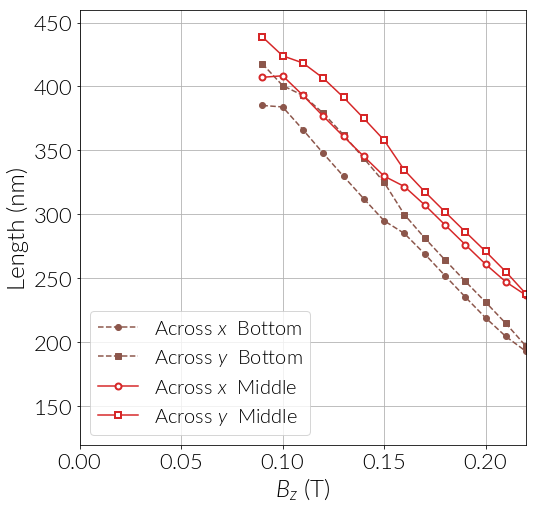

In [138]:
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)

# Bottom layer
ax.plot(bubble_size_x[0][:, 0], bubble_size_x[0][:, 1], 'o--C5', label=r'Across $x$  Bottom')
ax.plot(bubble_size_y[0][:, 0], bubble_size_y[0][:, 1], 's--C5', label=r'Across $y$  Bottom')

# Centre layer
ax.plot(bubble_size_x[12][:, 0], bubble_size_x[12][:, 1], 'o-C3', markerfacecolor='w', mew=2,
        label=r'Across $x$  Middle')
ax.plot(bubble_size_y[12][:, 0], bubble_size_y[12][:, 1], 's-C3', markerfacecolor='w', mew=2,
        label=r'Across $y$  Middle')

ax.set_xlabel(r'$B_{z}$ (T)')
ax.set_ylabel(r'Length (nm)')

ax.legend()
ax.grid()

ax.set_xlim(0, 0.22)
ax.set_ylim(120, 460)

plt.savefig('bubble_size_vs_Bz_A20e-12_mu0Ms_648e-3_L800nm_t200nm.png',
            bbox_inches='tight', dpi=200)

## Thickness: 200 nm. Length: 600 nm 

In [123]:
sim_folder = 'sims/oommf/isolated_typeII_bubble_A20pJm-2_mu0Ms648e-3_field-sweep/omfs_L600nm_t200nm/'
find_field = lambda f: int(re.search('(?<=_Bz)\d+(?=mT)', f).group(0))
file_list = sorted(glob.glob(sim_folder + '*.omf'), key=find_field)

In [124]:
bubble_size_x = {}
bubble_size_y = {}
    
for j, i in enumerate(range(0, 17)):
    # print(i)
    # _file = file_list[file_index]
    _file = file_list[i]
    Bz = find_field(_file)
    print('Processing: Bz = {} mT'.format(Bz))
    
    omf_file = ot.OOMMFDataRead(_file)
    omf_file.set_coordinates()
    omf_file.read_m()

    # rgb_map = ot.generate_RGBs(np.column_stack((omf_file.mx, omf_file.my, omf_file.mz)))
    
    xs, ys, zs = np.unique(omf_file.x),np.unique(omf_file.y), np.unique(omf_file.z)

    # Create empty array when calling the first calculation
    if j == 0:
        for z_index in range(len(zs)):
            bubble_size_x[z_index] = []
            bubble_size_y[z_index] = []
    
    for z_index in range(len(zs)):

        filter_across_x = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.y == ys[len(ys) // 2]) 

        filter_across_y = np.logical_and(omf_file.z == zs[z_index],
                                         omf_file.x == xs[len(xs) // 2]) 

        mz_across_x = si.interp1d(omf_file.x[filter_across_x], 
                                  omf_file.mz[filter_across_x],
                                  kind='cubic')
        mz_across_y = si.interp1d(omf_file.y[filter_across_y], 
                                  omf_file.mz[filter_across_y],
                                  kind='cubic')

        size_0 = so.brentq(mz_across_x, -280, 0)
        size_1 = so.brentq(mz_across_x, 0, 280)
        bubble_size_x[z_index].append([Bz * 1e-3, size_1 - size_0])

        size_0 = so.brentq(mz_across_y, -280, 0)
        size_1 = so.brentq(mz_across_y, 0, 280)
        bubble_size_y[z_index].append([Bz * 1e-3, size_1 - size_0])
        
for z_index in range(len(zs)):
    bubble_size_x[z_index] = np.array(bubble_size_x[z_index])
    bubble_size_y[z_index] = np.array(bubble_size_y[z_index])

Processing: Bz = 40 mT
Processing: Bz = 50 mT
Processing: Bz = 60 mT
Processing: Bz = 70 mT
Processing: Bz = 80 mT
Processing: Bz = 90 mT
Processing: Bz = 100 mT
Processing: Bz = 110 mT
Processing: Bz = 120 mT
Processing: Bz = 130 mT
Processing: Bz = 140 mT
Processing: Bz = 150 mT
Processing: Bz = 160 mT
Processing: Bz = 170 mT
Processing: Bz = 180 mT
Processing: Bz = 190 mT
Processing: Bz = 200 mT


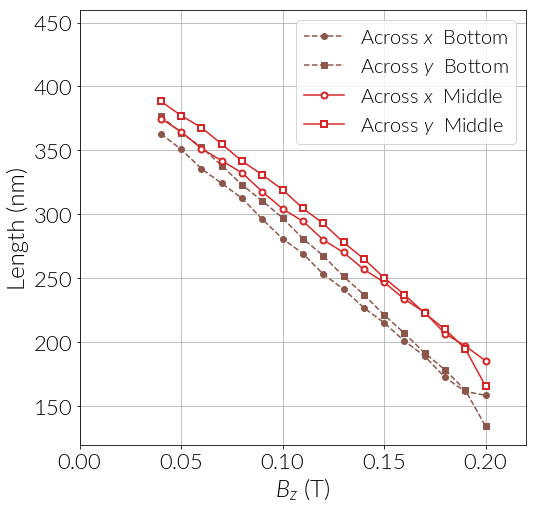

In [131]:
f = plt.figure(figsize=(8, 8))
ax = f.add_subplot(111)

# Bottom layer
ax.plot(bubble_size_x[0][:, 0], bubble_size_x[0][:, 1], 'o--C5', label=r'Across $x$  Bottom')
ax.plot(bubble_size_y[0][:, 0], bubble_size_y[0][:, 1], 's--C5', label=r'Across $y$  Bottom')

# Centre layer
ax.plot(bubble_size_x[12][:, 0], bubble_size_x[12][:, 1], 'o-C3', markerfacecolor='w', mew=2,
        label=r'Across $x$  Middle')
ax.plot(bubble_size_y[12][:, 0], bubble_size_y[12][:, 1], 's-C3', markerfacecolor='w', mew=2,
        label=r'Across $y$  Middle')

ax.set_xlabel(r'$B_{z}$ (T)')
ax.set_ylabel(r'Length (nm)')

ax.legend()
ax.grid()

ax.set_xlim(0, 0.22)
ax.set_ylim(120, 460)

plt.savefig('bubble_size_vs_Bz_A20e-12_mu0Ms_648e-3_L600nm_t200nm.png',
            bbox_inches='tight', dpi=200)